<a href="https://colab.research.google.com/github/sai8e/StockMarketProject/blob/main/GettingStockData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting a single stock data and exporting it as CSV



In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import os

def writeToCvs(ticker, beginningDate, endDate):
  dt = yf.download(ticker,beginningDate, endDate)
  dt.to_csv(r'./stock/'+ticker+'.csv')
  return dt

# Get the data for the stock
newpath = r'./stock' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

IBM_data = writeToCvs('IBM', '1911-01-01','2021-10-13')
print(IBM_data)


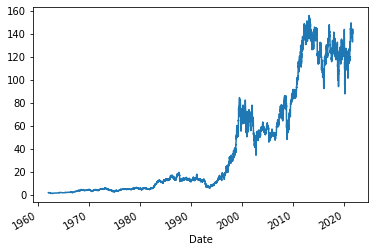

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

IBM_data['Adj Close'].plot()  
plt.show()

# Multiple Tickers and exporting it as CSV


In [ ]:
#  Dow Jones 30
tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average#Components')[1]['Symbol'].values.tolist()

print(tickers)

for ticker in tickers:
  writeToCvs(ticker, '2019-1-1', '2021-1-1')

# S&P 500
tickers500 = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].values.tolist()

for ticker in tickers500:
  writeToCvs(ticker, '2019-1-1', '2021-1-1')




[*********************100%***********************]  30 of 30 completed
                 AAPL        AMGN        AXP  ...         VZ        WBA        WMT
Date                                          ...                                 
2019-01-02  39.480000  191.899994  95.680000  ...  56.020000  68.040001  93.339996
2019-01-03  35.547501  188.979996  93.430000  ...  56.220001  67.330002  92.860001
2019-01-04  37.064999  195.440002  97.639999  ...  56.360001  69.570000  93.440002
2019-01-07  36.982498  198.070007  98.169998  ...  56.720001  69.970001  94.540001
2019-01-08  37.687500  200.610001  98.650002  ...  58.380001  71.370003  95.199997

[5 rows x 30 columns]


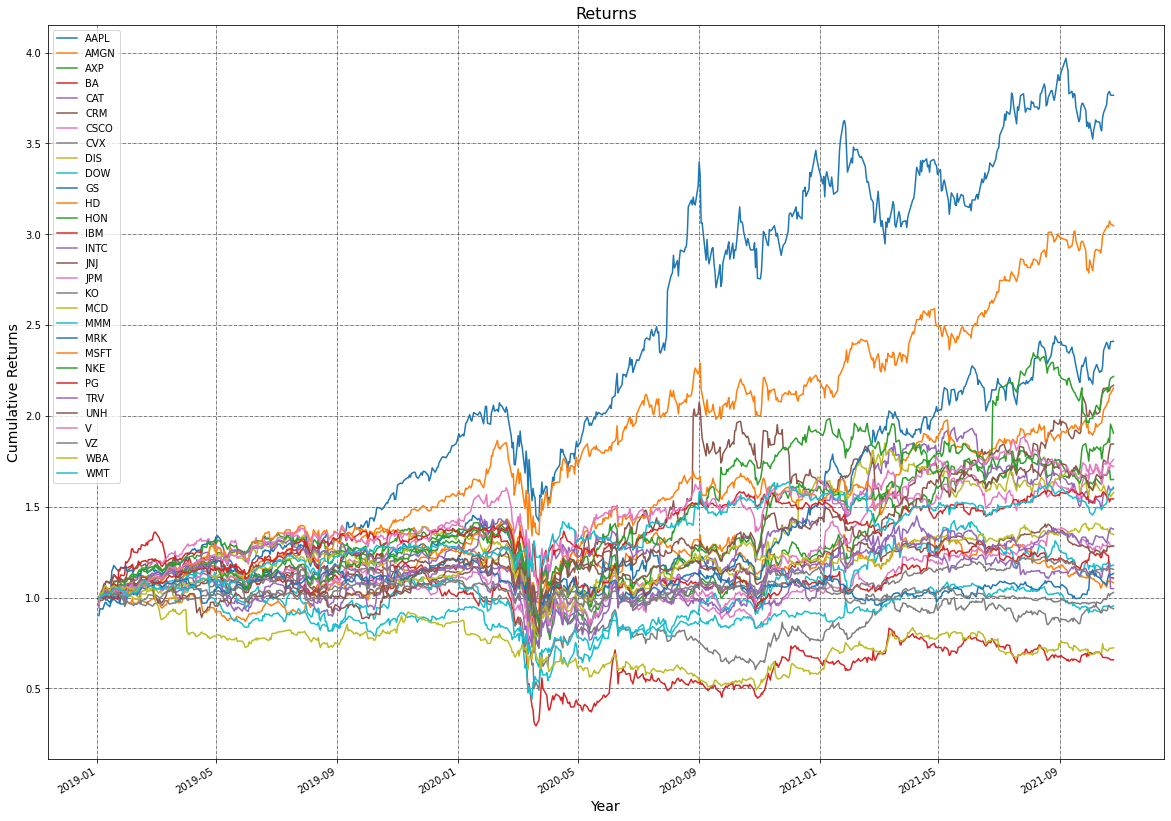

In [55]:
import pandas as pd
import yfinance as yf

data = yf.download(tickers,'2019-1-1')['Close']

print(data.head())


((data.pct_change()+1).cumprod()).plot(figsize=(20, 15))
# data.plot(figsize=(20,15))


plt.legend()


plt.title("Returns", fontsize=16)


plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)


plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()